In [47]:
import numpy as np
import tensorflow as tf

from tensorflow.contrib.distributions import Normal, TransformedDistribution
from tensorflow.contrib.distributions.python.ops import bijectors

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [171]:
tf.reset_default_graph()

sess = tf.InteractiveSession()

normal = Normal(0., 1.)

log_normal = TransformedDistribution(
  distribution=normal,
  bijector=bijectors.Inline(
    forward_fn=tf.exp,
    inverse_fn=tf.log,
    inverse_log_det_jacobian_fn=(
      lambda y: -tf.reduce_sum(tf.log(y), axis=-1)),
  name="LogNormalTransformedDistribution"))

N = 10000

normal_x = normal.sample(N)
log_normal_x = log_normal.sample(N)
p_log_normal_x = log_normal.prob(log_normal_x)

a, b = -3, 3
x = tf.range(a, b, (b - a) * 1e-4)
px = normal.prob(x)
# plogx = log_normal.prob(tf.exp(x))

In [173]:
vx, vpx, normal_xx, log_normal_xx, plogx = sess.run([x, px, normal_x, log_normal_x, p_log_normal_x])

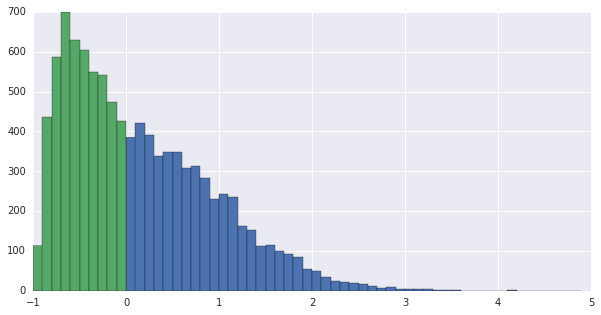

In [222]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# ax.scatter(vx, vpx, c='g', marker='.', label='normal')

# ax.scatter(vx, vpx, c='g', marker='.', label='normal')

pos = vx > 0
neg = vx <= 0
nx = vx[neg]
npx = vpx[neg]


a = normal_xx.copy()
p, n = a > 0, a <= 0
# a = vx.copy()
a[n] = np.exp(a[n]) - 1

bins = np.arange(-1, 5, .1)
# _ = ax.hist(a, bins=bins)
_ = ax.hist(a[p], bins=bins[10:])
_ = ax.hist(a[n], bins=bins[:11])

# _ = ax.hist(-log_normal_xx - 1, bins='auto')


# ax.scatter(vx[pos], vx[pos], c='r', marker='.', label='linear')
# ax.scatter(nx, np.exp(nx) - 1, c='r', marker='.', label='linear')


# l = npx * np.exp(-nx)

# ax.scatter(nx, l, c='m', marker='.', label='log_normal')

# ax.scatter(abs(vx), 2 * vpx, c='r', marker='.', label='folded')

# # ax.scatter(vx, vplx, c='c', marker='.', label='log_normal')

# pos = vx > 0


# ax.scatter(vx[pos], vpx[pos], c='c', marker='.', label='elu')

# ax.grid(True)
# ax.set_xlim([a, b])
# ax.set_ylim([-.05, 1.])
# ax.legend(loc='best')

In [207]:
p = a > 0
n = a < 0
print a[p].mean(), a[p].var()
print a[n].mean(), a[n].var()
print a.mean(), a.var()
print (a[p].mean() * p.sum() + a[n].mean() * n.sum()) / (p.sum() + n.sum())


0.796566 0.366094
-0.475839 0.0629407
0.153111 0.61749
0.153110594162


In [216]:
rm = np.sqrt(2. / np.pi)
rv = 1 - 2. / np.pi
print 'relu mean', rm
print 'relu var', rvbut w

SyntaxError: invalid syntax (<ipython-input-216-e67f8e7dff12>, line 4)

In [217]:
print a[p].var(), a[n].var(), a[p].var() + a[n].var(), a.var()
print (a[p].var() * p.sum() + a[n].var() * n.sum()) / (p.sum() + n.sum())
print a.var() * a.shape[0], a.shape[0], p.sum(), n.sum()

0.366094 0.0629407 0.429035 0.231338
0.212789439535
2313.38128448 10000 4943 5057


In [304]:
# a = normal_xx.copy()
# p, n = a > 0, a <= 0
# a[n] = np.exp(a[n]) - 1

# x = a[p]
# y = a[n]

x = abs(np.random.randn(10000)) 
z = -abs(np.random.randn(10000))
y = np.exp(z) - 1
v = np.concatenate([x, y])

In [241]:
print x.var(), 1. - 2. / np.pi
print y.var()
print x.var() + y.var()
print np.concatenate((x, y)).var()
print (x+y).var()

0.362273173071 0.363380227632
0.0625406316469
0.424813804718
0.618129655413
0.424364654524


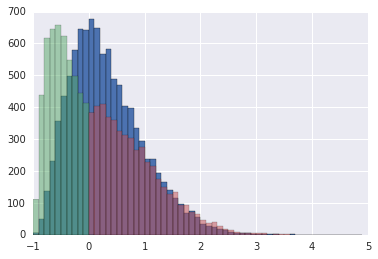

In [302]:
fig, ax = plt.subplots(1, 1)

bins = np.arange(-1, 5, .1)
c = x+y
weights = np.ones_like(x) / 2
_ = ax.hist(c, bins=bins, normed=False)
ax.hist(y, bins=bins[:11], alpha=.5, normed=False, weights=weights)
_ = ax.hist(x, bins=bins[10:], alpha=.5, normed=False, weights=weights)

In [305]:
print v.mean(), v.var()

0.161288060456 0.617148512233


In [495]:
def normal(x, mu, sigma):
    p = 1. / (sigma * np.sqrt(2 * np.pi)) * np.exp(-.5 * ((x - mu) / sigma)**2)
    return p

def lognormal(y, mu, sigma):
    p = 1. / (y * sigma * np.sqrt(2 * np.pi)) * np.exp(-.5 * ((np.log(y) - mu) / sigma)**2)
    return p



def moments(mu, sigma):
    m = np.exp(mu + .5 * sigma**2)
    v = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)
    return m, v

def inv_moments(m, v):
    mu = np.log(m / np.sqrt(1 + v / m**2))
    sigma = np.sqrt(np.log(1 + v / m**2))
    return mu, sigma

def reparam_lognormal(x, mu, sigma):
#     y = np.exp(x)
    
    m, v = moments(mu, sigma)
    print m, v**.5
    
    m = m - 0
    
    mu, sigma = inv_moments(m, v)
    print mu, sigma
    
    m, v = moments(mu, sigma)
    print m, v**.5
    
#     mu = np.log(m / np.sqrt(1 + v / m**2))
#     sigma = np.sqrt(np.log(1 + v / m**2))
#     print 'mu = {}, sigma = {}'.format(mu, sigma)
    
#     return lognormal(y, mu_log, sigma_log)
    return lognormal(-x*np.e, mu, sigma)

def elu_distrib(x, mu, sigma):
    pos = x >= 0
    neg = np.logical_not(pos)
    
    p = np.zeros_like(x)
    p[pos] = normal(x[pos], mu, sigma)
    n = reparam_lognormal(x[neg], mu, sigma)
#     p[neg] = n / (2 * n.sum() * (x[1] - x[0])) 
#     p[neg] = lognormal(-x[neg], mu, sigma)
    return p

1.6487212707 2.1611974159
2.22044604925e-16 1.0
1.6487212707 2.1611974159


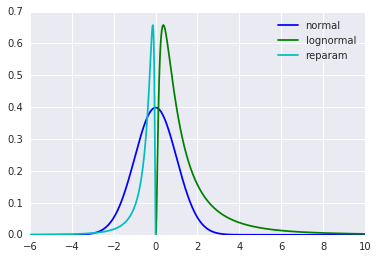

In [496]:
dx = 1e-2
x = np.arange(-6, 10, dx)
nx = normal(x, 0., 1.)
lnx = lognormal(x, 0., 1.)
rlnx = reparam_lognormal(x, 0., 1.)
# elu = elu_distrib(x, 0., 1.)

fig, ax = plt.subplots(1, 1)
ax.plot(x, nx, 'b', label='normal')
ax.plot(x, lnx, 'g', label='lognormal')
ax.plot(x, rlnx, 'c', label='reparam')
# ax.plot(x, elu, 'r', label='elu')
ax.legend(loc='best')

In [429]:
print nx.sum() * dx
print lnx[x>0].sum() * dx
print rlnx.sum() * dx
print elu.sum()* dx

0.999999999044
0.989334826422
1.64872081025
1.4980052886
